# Finding the Best Online Markets to Advertise In

We're working for an an e-learning company that offers courses on programming for 59$ per month.

Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

We want to promote our product and we'd like to invest some money in advertisement. 

### Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. 

This is very costly, however, and it's a good call to explore cheaper options first.

### One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. 

## 1. Reading in the dataset from freeCodeCamp's Survey and quickly exploring it

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

/usr/local/Cellar/ipython/7.2.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [343]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
df.columns.values

array(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls',
       'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev',
       'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool',
       'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge',
       'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen',
       'CountryLive', 'EmploymentField', 'EmploymentFieldOther',
       'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning',
       'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther',
       'HasChildren', 'HasDebt', 'HasFinancialDependents',
       'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary',
       'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x',
       'ID.y',

To get some insight into what the columns are describing please refer to the original [freeCodeCamp Survey](https://freecodecamp.typeform.com/to/N90qR4) or directly in their [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

## 2. Population analysis

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. 

We'd like to know:

- **Where** are these new coders located;
- **What are the locations** with the greatest number of new coders;
- **How much money** new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify if the sampled dataset is representative for our population of interest and if it has the right categories of people for our purpose.

The **JobRoleInterest column** describes for every participant the role(s) they'd be interested in working.


In [345]:
df['JobRoleInterest'].value_counts().head()

Full-Stack Web Developer     823
  Front-End Web Developer    450
  Data Scientist             152
Back-End Web Developer       142
  Mobile Developer           117
Name: JobRoleInterest, dtype: int64

In [346]:
df['JobRoleInterest'].count()

6992

In [347]:
job_role_sample = []
df_job_role = df.copy()
df_job_role = df_job_role[df_job_role['JobRoleInterest'].notnull()].copy()

Let's now build a **frequency table** for our collected sample list so that we can understand if our sample is representative for our dataset population.

In [348]:
job_role_frequency_table = df_job_role['JobRoleInterest'].value_counts(normalize = True)*100
job_role_frequency_table = job_role_frequency_table.sort_index(ascending = True)

In [349]:
print(job_role_frequency_table)

  Data Scientist                                                                                                                                                                                                                                                            2.173913
  Data Scientist,   DevOps / SysAdmin                                                                                                                                                                                                                                       0.014302
  Data Scientist,   DevOps / SysAdmin,   Front-End Web Developer, Full-Stack Web Developer, Data Engineer                                                                                                                                                                   0.014302
  Data Scientist,   DevOps / SysAdmin,   Mobile Developer,   Front-End Web Developer,   Quality Assurance Engineer, Information Security,   Product Manager,   User Exper

From a first visual analysis of the frequency table one can tell that most people have two or more interests.
Let's try and separate these so that we can have a more accurate frequency table on the frequency on number of interests.

In [350]:
separate_answers = df_job_role['JobRoleInterest'].str.split(', ')

In [351]:
num_interests = separate_answers.apply(lambda x: len(x))
interests_freq_table = num_interests.value_counts(normalize = True).sort_index(ascending = True) * 100

In [352]:
interests_freq_table

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

## 3. Frequency distribution visualization

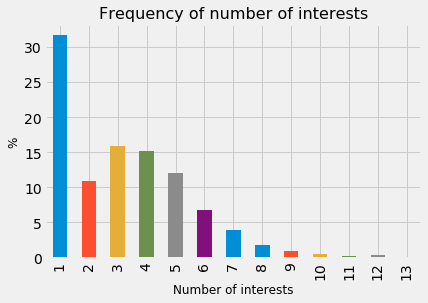

In [353]:
%matplotlib inline

plt.style.use('fivethirtyeight')

interests_freq_table.plot.bar()

plt.xlabel('Number of interests', fontsize = 12)
plt.ylabel('%', fontsize = 12)
plt.title('Frequency of number of interests', fontsize = 16)

plt.show()

From the graph it is clear that the highest frequency relates to 1 interest.

The focus of the analysis is on web and mobile development. 
Let's find out how many people are interested in at least one of these two subjects.

In [354]:
web_mobile_freq = df_job_role['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')
web_mobile_freq_graph = web_mobile_freq.value_counts(normalize = True) * 100
web_mobile_freq_graph_abs = web_mobile_freq.value_counts()

web_mobile = pd.DataFrame(
    data = {
    "Absolute" : web_mobile_freq_graph_abs,
    "Percentage" : round(web_mobile_freq_graph).astype(int)
    }
)

web_mobile

,Absolute,Percentage
True,6030,86
False,962,14


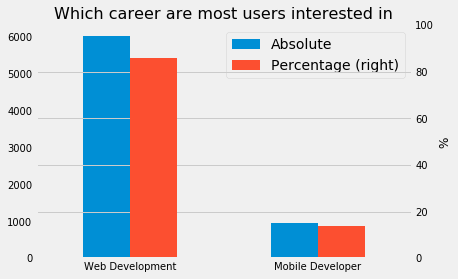

In [355]:
plt.style.use('fivethirtyeight')

web_mobile.plot(kind = 'bar', secondary_y = 'Percentage', rot = 0, fontsize = 10, legend = True)

plt.xticks([0, 1], ['Web Development', 'Mobile Developer'], rotation = 0)
plt.ylim(0, 100)
plt.ylabel('%', fontsize = 12)
plt.title('Which career are most users interested in', fontsize = 16)

plt.show()

#### Our first analysis showed that 86% of the users are more interested in Web Development while the remaining 14% would choose Mobile Developer.

Just as a reminder, the objective of this project is to identify Web and Mobile Devs in the dataset population so that our "fictious" e-company can successfully target them with ads.

Now we can start finding out where these new coders are located, and what are the densities (how many coders there are) for each location. For that we'll work with the **CountryLive** column which tells us where the coders live so we can identify the best potential markets.

In [356]:
df_country_live = df.copy()

To make sure we're working with a representative sample we'll be dropping again the rows for which no JobRoleInterest answer was provided. 
If a participant didn't respond we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [357]:
df_country_live['JobRoleInterest'].dropna(inplace = True)
df_country_live['CountryLive'].value_counts()

United States of America         5791
India                            1400
United Kingdom                    757
Canada                            616
Brazil                            364
Germany                           324
Poland                            265
Russia                            263
Australia                         259
France                            228
Spain                             217
Nigeria                           214
Ukraine                           202
Romania                           171
Italy                             164
Mexico                            155
Netherlands (Holland, Europe)     142
Philippines                       135
South Africa                      126
Turkey                            120
Greece                            116
Serbia                            115
Argentina                         113
Pakistan                          109
Kenya                              92
Indonesia                          91
China       

In [358]:
country_live_freq_table_prct = df_country_live['CountryLive'].value_counts(normalize = True, ascending = False) * 100
country_live_freq_table_abs = df_country_live['CountryLive'].value_counts(ascending = False)

print("Absolute Frequencies")
print(country_live_freq_table_abs.head())
print("""
\n
Percentages""")
print(country_live_freq_table_prct.head())

Absolute Frequencies
United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Name: CountryLive, dtype: int64



Percentages
United States of America    37.760824
India                        9.128847
United Kingdom               4.936098
Canada                       4.016693
Brazil                       2.373500
Name: CountryLive, dtype: float64


Our code helped us build a table of absolute and relative frequencies (%) for the best markets to advertise in.

Let's transform our frequency results into a proper dataframe.

In [359]:
best_markets = pd.DataFrame(data = {'Absolute Frequencies' : country_live_freq_table_abs,
                    'Percentage (%)' : round(country_live_freq_table_prct).astype(int)}
            ).head()

best_markets

,Absolute Frequencies,Percentage (%)
United States of America,5791,38
India,1400,9
United Kingdom,757,5
Canada,616,4
Brazil,364,2


The **USA** are the most represented country, followed by **India** and the **UK**.

For the purpose of this project we have decided we'll first start advertising within 4 English speaking countries (as the courses would be written in English), so: **USA** (38%), **India** (9%), **UK** (5%), and **Canada** (4%).

We can continue by figuring out how much money new coders are actually willing to spend on learning. 

Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

Let's find out how much these new coders are spending on online education **per month**.

In [360]:
# Some students claimed they have just started studying (0 months). To avoid dividing by 0 let's replace 0 with 1.

df['MonthsProgramming'].replace(0, 1, inplace = True)
df["Money Spent per Month"] = df['MoneyForLearning'] / df['MonthsProgramming']

In [361]:
# And let's drop all the NaN values.

df.dropna(subset = ['CountryLive'], inplace = True)
df['MoneyForLearning'].dropna(inplace = True)
df['Money Spent per Month'].dropna(inplace = True)

In [362]:
mean_spend_country = df.groupby('CountryLive').mean()

In [363]:
pd.DataFrame(mean_spend_country["Money Spent per Month"][['United States of America', 'India', 'United Kingdom', 'Canada']])

,Money Spent per Month
CountryLive,
United States of America,206.297711
India,66.526198
United Kingdom,55.774980
Canada,118.434054


## 4. Box Plotting for outlier detection

So it appears that even though Canada shows last in the list it would be a better bet than the United Kingdom and India.

Let's now look for outliers in our results so that we can better estimate the potential best markets to start advertising in.

For this we'll plot 4 box plots which are very helpful for spotting outliers in the distribution.

In [364]:
countries_boxplot = df.copy()
countries_boxplot["Money Spent per Month"].dropna(inplace = True)

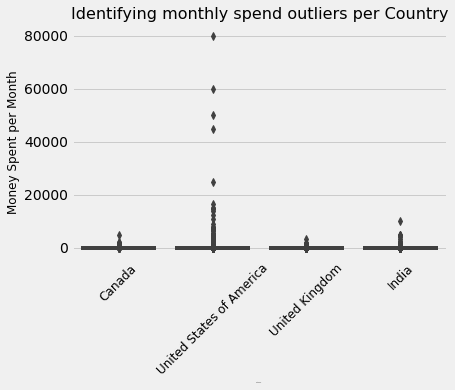

In [365]:
import seaborn as sns

countries_boxplot = pd.DataFrame(df[df['CountryLive'].isin([
    'United States of America', 'India', 'United Kingdom', 'Canada'])])

plt.xticks(rotation = 45, fontsize = 12)
plt.title('Identifying monthly spend outliers per Country', fontsize = 16)
plt.xlabel('', fontsize = 0)
plt.ylabel('', fontsize = 12)
sns.boxplot(x = 'CountryLive', y = 'Money Spent per Month', data = countries_boxplot)

plt.show()

We can see there are quite some extreme outliers for the USA so let's filter these.

In [366]:
df_outliers = df.copy()
df_outliers = df_outliers[df_outliers['Money Spent per Month'] < 10000]

In [367]:
mean_spend_country_outliers = df_outliers.groupby('CountryLive').mean()
pd.DataFrame(mean_spend_country_outliers["Money Spent per Month"][['United States of America', 'India', 'United Kingdom', 'Canada']])

,Money Spent per Month
CountryLive,
United States of America,141.079827
India,58.384006
United Kingdom,55.774980
Canada,118.434054


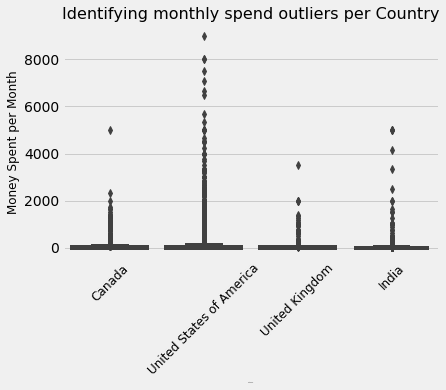

In [368]:
countries_boxplot_no_outliers = pd.DataFrame(df_outliers[df_outliers['CountryLive'].isin([
    'United States of America', 'India', 'United Kingdom', 'Canada'])])

plt.xticks(rotation = 45, fontsize = 12)
plt.title('Identifying monthly spend outliers per Country', fontsize = 16)
plt.xlabel('', fontsize = 0)
plt.ylabel('', fontsize = 12)
sns.boxplot(x = 'CountryLive', y = 'Money Spent per Month', data = countries_boxplot_no_outliers)

plt.show()

In [369]:
countries_boxplot_no_outliers["Money Spent per Month"].describe()

count    7955.000000
mean      119.267012
std       462.933442
min         0.000000
25%         0.000000
50%         2.000000
75%        33.333333
max      9000.000000
Name: Money Spent per Month, dtype: float64

In [370]:
countries_boxplot_no_outliers[countries_boxplot_no_outliers["Money Spent per Month"] > 2500]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money Spent per Month
484,25.0,1.0,1.0,0.0,Codesmith,1.0,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2857.142857
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
723,22.0,1.0,1.0,0.0,Dev Bootcamp,0.0,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
2404,22.0,1.0,1.0,1.0,Telegraph Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,7083.333333
2432,37.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3250.000000
2480,35.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.000000
3132,28.0,1.0,1.0,0.0,App Academy,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2857.142857


Maybe it could also be interesting taking a look into students who have already attended and finished a bootcamp.

Most likely this population won't be interested in attending our introductory e-courses.

In [371]:
def graduated(country):
    
    countries_boxplot["AttendedBootcamp"].dropna()
    countries_boxplot["BootcampFinish"].dropna()
    
    graduated_bootcamp = countries_boxplot[
    (countries_boxplot["CountryLive"] == country) &
    (countries_boxplot["AttendedBootcamp"] == 1) &
    (countries_boxplot["BootcampFinish"] == 1) &
    (countries_boxplot["Money Spent per Month"] > 0)]
    
    countries_boxplot.drop(graduated_bootcamp.index)

In [372]:
graduated("India")
graduated("United States of America")
graduated("Canada")
graduated("United Kingdom")

Now let's filter out all the outliers seen in the box plots relative to the 4 countries and then choose the two best potential markets.

#### India outliers

In [373]:
india_outliers = countries_boxplot[(countries_boxplot['CountryLive'] == 'India') & 
                                   (countries_boxplot["Money Spent per Month"] >= 2500)]

countries_boxplot.drop(india_outliers.index)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money Spent per Month
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0,16.666667
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
7,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000
8,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.137931
10,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.000000
12,18.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Canada outliers

In [374]:
canada_outliers = countries_boxplot[(countries_boxplot["CountryLive"] == 'Canada') &
                                   (countries_boxplot['Money Spent per Month'] > 4000)]

countries_boxplot.drop(canada_outliers.index)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money Spent per Month
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0,16.666667
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
7,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000
8,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.137931
10,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.000000
12,18.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### UK outliers

In [375]:
uk_outliers = countries_boxplot[(countries_boxplot["CountryLive"] == 'United Kingdom') &
                               (countries_boxplot["Money Spent per Month"] > 3000)]

countries_boxplot.drop(uk_outliers.index)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money Spent per Month
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0,16.666667
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
7,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000
8,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.137931
10,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.000000
12,18.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### USA outliers

In [376]:
US_bootcamp_students = countries_boxplot[
                 (countries_boxplot["CountryLive"] == "United States of America") &
                 (countries_boxplot["Money Spent per Month"] > 6000) &
                 (countries_boxplot["AttendedBootcamp"] == 1)]

Out of curiosity, and because the US is the country where students spend the highest average amounts per month, let's dig deeper into the frequency money spent per month for students who actually attend(ed) programming bootcamps.

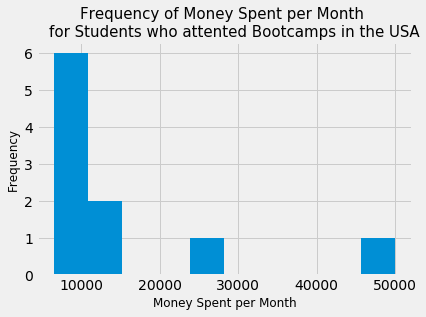

In [377]:
US_bootcamp_students["Money Spent per Month"].plot.hist()

plt.xlabel("Money Spent per Month", fontsize = 12)
plt.ylabel(s = "Frequency", fontsize = 12)
plt.title("""Frequency of Money Spent per Month 
    for Students who attented Bootcamps in the USA""", fontsize = 15)
plt.show()

It seems like spending 25 and 50k per month for someone who has just started programming 1 and 2 months ago is unreal. This could have been a problem of misinterpreation of the question.

In [379]:
usa_outliers = countries_boxplot[(countries_boxplot["CountryLive"] == 'United States of America') &
                                (countries_boxplot["Money Spent per Month"] > 6000)]

countries_boxplot.drop(usa_outliers.index)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money Spent per Month
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0,16.666667
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
7,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000
8,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.137931
10,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.000000
12,18.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
mean_spend_country_no_outliers = countries_boxplot.groupby('CountryLive').mean()
pd.DataFrame(mean_spend_country_no_outliers["Money Spent per Month"][['United States of America', 'India', 'United Kingdom', 'Canada']])

,Money Spent per Month
CountryLive,
United States of America,206.297711
India,66.526198
United Kingdom,55.774980
Canada,118.434054


## Best Potential Markets

When it comes to **money spent per month** it is clear that the USA ($206 per month) and Canada ($118 per month) should be the two main markets to target.

Considering that our e-learning company is selling subscriptions at $59 per month we can safely discard the UK. 

That leaves us with India.

In [381]:
best_markets

,Absolute Frequencies,Percentage (%)
United States of America,5791,38
India,1400,9
United Kingdom,757,5
Canada,616,4
Brazil,364,2


As seen before we have **44% more customers in India than we do in Canada**. India's average spend per month is also higher than the monthly subscription our e-learning platform is charging.

So, should we go for Canada or India?

## Marketing strategies and approaches

We know for sure that most of our budget should be on the USA. Let's check out some possible strategies for country targeting.

1. **100% budget on the USA**:
    - Even though this is a safe bet we might be losing some potential customers in the other two markets (India and Canada).
    
2. **Split between the 3 markets**:
    - 60% on the USA, 20% in Canada, 20% in India;
    - This would be the most "optimizable" of the strategies since we could, during the ad promotion, check which countries are converting more and then change budgets accordingly;
    
3. **Play safe and go with the biggest spending markets (USA + Canada)**:
    - 70% for the USA, 30% for Canada.

# Conclusions

In this project we analyzed the frequencies of _users per country_ (they are currently living in) as well as the _average ammount of monthly spend per country_.

_Frequency tables_ were created along with _box plots_ to help us find the best potential advertising markets. During the process it was found that the dataset contained several outliers which we had to deal with.

The best country to definitely advertise in is the USA. The second best market, in theory, would be Canada but since India has such a large community it was also considered in the final results.

Finally, it was decided that **Marketing Strategy 2.** would be the best approach as we could reach 3 markets and optimize our marketing campaign during the promotion.